# Import Required Libraries
Import libraries such as TensorFlow, Keras, NumPy, Matplotlib, and OpenCV.

In [2]:
# Import necessary libraries for face recognition using deep learning
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # Keras for building and training models
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization
import cv2  # OpenCV for image processing
import gdown # gdown for downloading files

In [3]:
# Descargar los datos compartidos de Google Drive
url = 'https://thinkingneuron.com/wp-content/uploads/2020/10/Face-Images.zip'
#
!mkdir -p Face-Images
#
output = './Face-Images/Face-Images.zip'
gdown.download(url, output, quiet=False, fuzzy=True)
#
!unzip -qq Face-Images/Face-Images.zip -d Face-Images/
!rm -f Face-Images/Face-Images.zip

Downloading...
From: https://thinkingneuron.com/wp-content/uploads/2020/10/Face-Images.zip
To: /content/Face-Images/Face-Images.zip
15.3MB [00:00, 24.6MB/s]


# Load and Preprocess the Dataset
Load the face dataset, resize images, normalize pixel values, and split the data into training and testing sets.

In [7]:
# Load the face dataset
from sklearn.model_selection import train_test_split  # For splitting the dataset
import os  # For file and directory operations

# Define the path to the dataset
dataset_path = "./Face-Images/Face Images/Final Training Images/"  # Replace with the actual dataset path

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from the dataset directory
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)  # Read the image
            if image is not None:
                image = cv2.resize(image, (128, 128))  # Resize image to 128x128
                images.append(image)
                labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images, dtype="float32")
labels = np.array(labels)

# Normalize pixel values to the range [0, 1]
images = images / 255.0

# Encode labels as integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (195, 128, 128, 3)
Testing data shape: (49, 128, 128, 3)
Training labels shape: (195,)
Testing labels shape: (49,)


# Build the CNN Model
Define a CNN architecture using Keras Sequential API with layers like Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.

In [8]:
# Build the CNN model using Keras Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    # First convolutional layer with ReLU activation and max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer with ReLU activation and max pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer with ReLU activation and max pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a 1D vector
    Flatten(),

    # Fully connected dense layer with ReLU activation
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Output layer with softmax activation for multi-class classification
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
Compile the model with an optimizer, loss function, and metrics, then train it using the training dataset.

In [9]:
# Compile the model with an optimizer, loss function, and metrics
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy loss for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model using the training dataset
history = model.fit(
    X_train,  # Training images
    y_train,  # Training labels
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Print progress during training
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.0627 - loss: 3.1298 - val_accuracy: 0.0256 - val_loss: 2.7679
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.0323 - loss: 2.7812 - val_accuracy: 0.1795 - val_loss: 2.7429
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0743 - loss: 2.7305 - val_accuracy: 0.1026 - val_loss: 2.6961
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1266 - loss: 2.6700 - val_accuracy: 0.3333 - val_loss: 2.6320
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2584 - loss: 2.5418 - val_accuracy: 0.3846 - val_loss: 2.3838
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3303 - loss: 2.3788 - val_accuracy: 0.4359 - val_loss: 2.1932
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4049 - loss: 1.9764 - val_accuracy: 0.7692 - val_loss: 1.5537
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6008 - loss: 1.5254 - val_accuracy: 0.8205 - val_loss: 1.2618
Epoch 9/20

# Evaluate the Model
Evaluate the trained model on the test dataset and display metrics such as accuracy and loss.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9624 - loss: 0.0865
Test Accuracy: 95.92%
Test Loss: 0.0997


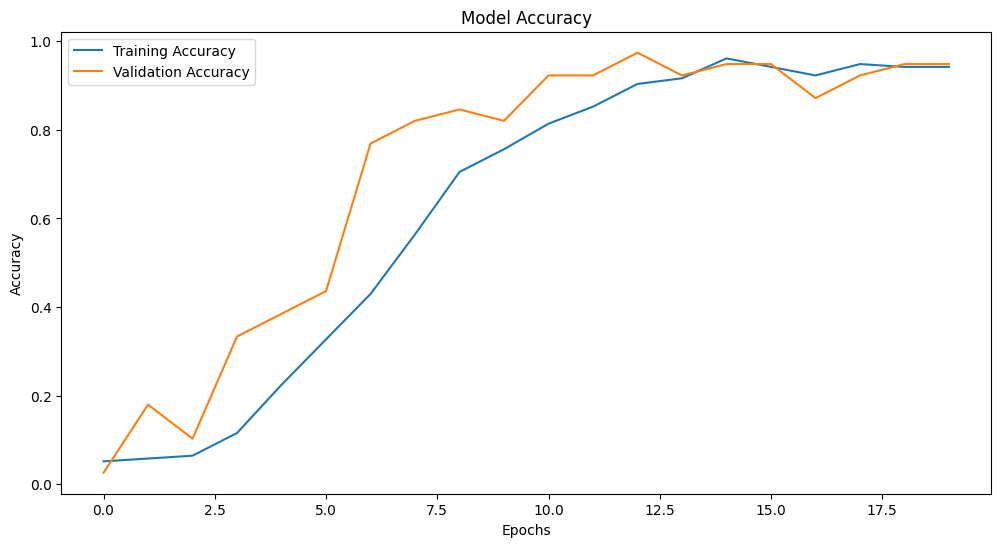

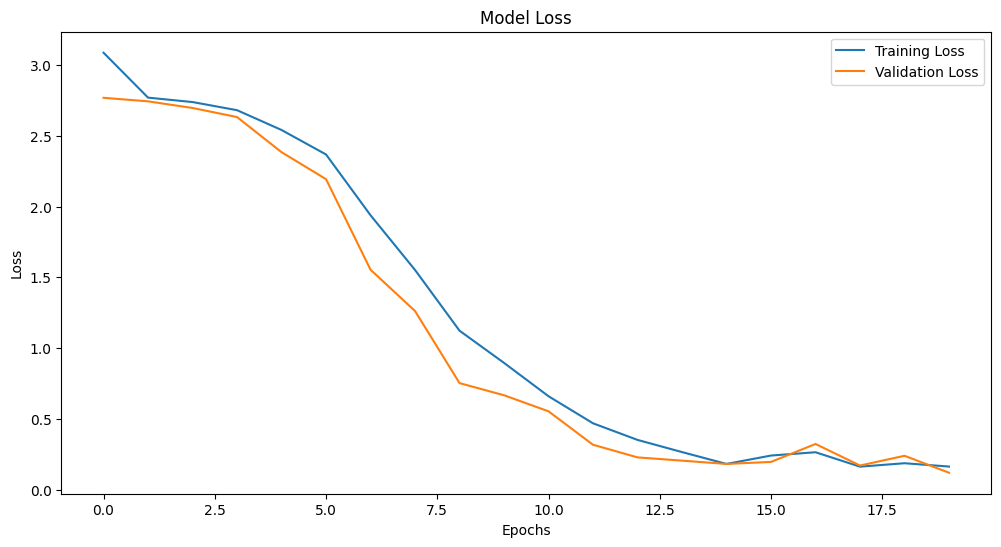

In [10]:
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy and loss
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Perform Face Recognition on Test Images
Use the trained model to predict and recognize faces in test images, displaying the results with Matplotlib.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


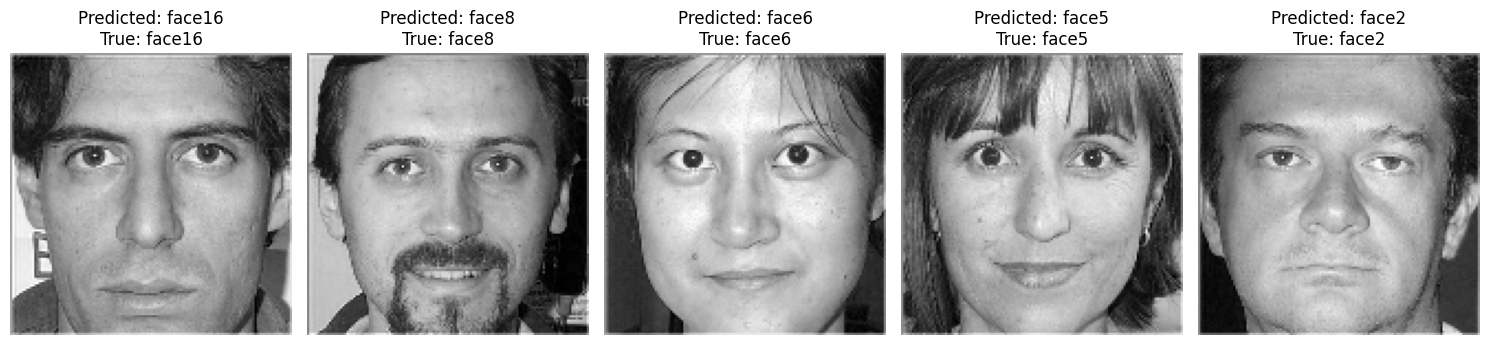

In [23]:
# Perform face recognition on test images
def recognize_faces(test_images, model, label_encoder):
    """
    Predict and recognize faces in test images using the trained model.

    Parameters:
    - test_images: Array of test images.
    - model: Trained CNN model.
    - label_encoder: LabelEncoder instance used for encoding labels.

    Returns:
    - predictions: List of predicted labels for the test images.
    """
    predictions = []
    for img in test_images:
        # Expand dimensions to match the input shape of the model
        img_expanded = np.expand_dims(img, axis=0)

        # Predict the class probabilities
        probabilities = model.predict(img_expanded)

        # Get the class with the highest probability
        predicted_class = np.argmax(probabilities, axis=1)[0]

        # Decode the predicted class to the original label
        predicted_label = label_encoder.inverse_transform([predicted_class])[0]
        predictions.append(predicted_label)
    return predictions

# Select a few test images for visualization
num_test_images = 5
selected_test_images = X_test[:num_test_images]
selected_test_labels = y_test[:num_test_images]

# Perform face recognition on the selected test images
predicted_labels = recognize_faces(selected_test_images, model, label_encoder)

# Display the test images along with their predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(num_test_images):
    plt.subplot(1, num_test_images, i + 1)
    plt.imshow(selected_test_images[i, :, :, 0], cmap=plt.cm.gray)
    plt.title(f"Predicted: {predicted_labels[i]}\nTrue: {label_encoder.inverse_transform([selected_test_labels[i]])[0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
images.shape

(244, 128, 128, 3)